## Linear Regression
### Python Implementation of Linear Regression from scratch
In [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) we try to model the relationship between a **scalar dependent variable** *y*  and one or more **independent variables (explanatory variables) x** .In the case of only one independent variable, then it's known as a **simple regression** or **univariate regression** with more than one independent variables being referred to as **multiple linear regression.**.

### Notation and Definitions:  
- $y:   $    target value. 
- $\boldsymbol{x}:   $    independent (explanatory) variable also known as the input variable or feature.
- $\alpha:$ is the learning rate which determmines the step size at each iteration
- $\boldsymbol{w},b :   $ are the parameters of the algorithm
- $f_{\boldsymbol{w},b}(x^{(i)}):  $ is our prediction for example $i$ using parameters $\boldsymbol{w},b$.
- $\boldsymbol{D} = \{{\boldsymbol{(x^{(1)}},y^{(1)})},...,\boldsymbol{(x^{(n)}},y^{(n)})\}$: is the set of n training examples, where:
    - $\boldsymbol{(x^{(i)}}) $ is the $d$ dimensional input vector ;being the feature vector consisting of$ (x_1,x_2, ...x_d)$ of the training example $\boldsymbol{i}$ 
    - $y^{(i)}$ is the desired output value for that input vector
- $(\boldsymbol{x^{(i)}},y^{(i)})$: an instance of a training example.

### The linear equation **y = wx +b**  
The linear equation defines how you fit a straight that models the relationship between y and x, where y is represented as a linear combination of the coefficients of w and x.  
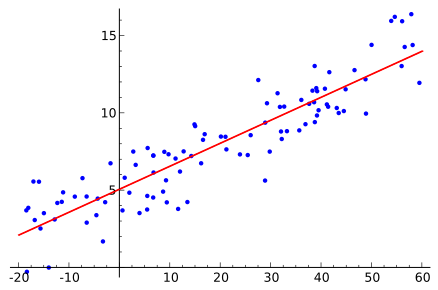


**where:**   
**w** represent the slope of the line and  
**b:** representing the value of the y-intercept where the line crosses the y-axis when x = 0

Our objective in using linear regression is to find the set of coefficients w's and b that best fit the line i.e that minimizes the distances of every points from the line the most.
### Training 
In training the linear regression, we use the mean squared error (MSE) as the cost function, which measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.Using the MSE as a cost function guarantee there will always be an optimal solution to the problem.  
Linear Regression model can be trained using :  
- Gradient Descent or
- The normal equation (closed form solution) having the form $ \boldsymbol{w}=(X^{T}X)^{-1}X^Ty $    
Where $\boldsymbol{X}$ is the matrix of all the input features of the training examples.

#### Gradient Descent Algorithm

- Given a set of training examples ${(x^{(n)},y^{(n)})}$: the goal of gradient descent is to minimize the cost function given below through an iterative process

$$
J(w,b)=\frac{1}{2m} \sum\limits_{i=0}^{m-1}=(f_{w,b}(x^{(i)}) - y^{(i)})^2 
$$ 

1. Start with some w,b
2. change w,b to reduce J(w,b)
3. Repeat untill we settle or converge to a minimum value    
We reduce J(w,b) by computing the gradient of the cost function J(w,b) and taking steps in the direction of steppest descent untill we converge to a minimum value.     
----
- **Step 0:** Initialize w,b to some initial value, where for multiple regression w is a vector
#### Until Converge:  
- **Step 1:** compute the gradient of $\boldsymbol{w}$ and b which is given below:

$$ 
\frac{\partial}{\partial w}J(w,b) = \frac{1}{m}\sum\limits_{i=0}^{m-1}= (f_{w,b}(x^{(i)}) - y^{(i)})\boldsymbol{x^{(i)}} \tag{1}
$$
$$\frac{\partial}{\partial b}J(w,b) = \frac{1}{m}\sum\limits_{i=0}^{m-1}= (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}$$
- Step 2:Set the new value of w has:
$$ w = w - \alpha \frac{\partial}{\partial w}J(w,b) \tag{3} $$
- and the new value of b has:
$$ b = b - \alpha \frac{\partial}{\partial b}J(w,b) \tag{4} $$

- Step 3: Repeat the procedure again untill we converge to some minimum value or run out of interations
---  

   <p  class='alert alert-info alert-box'>Note:<br>alpha is the learning rate which determines how long the step we take during gradient descent, which smaller values resulting in gradient descent converging too slowly and larger values resulting in onvershooting and causing our model to never converge</p> 
 


In [1]:
## Importing required modules
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(126)

In [2]:
## Creating a simple training set
X,y=make_regression(1000,n_features=5,noise=5)

In [3]:
## Split the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [4]:
# X_train has 5 features and 700 examples
print(f" the shape of X_train is {X_train.shape}")

 the shape of X_train is (700, 5)


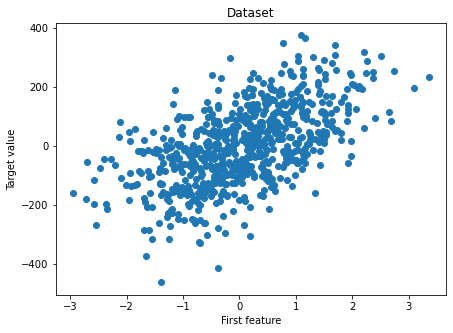

In [5]:
# Visualizing y_train against the first feature of X_train
fig=plt.figure(figsize=(7,5))
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Target value")
plt.scatter(X_train[:,0],y_train)

In [6]:
class LinearRegression:
    
    
    def predict(self,X):
        return np.dot(self.w,X.T) + self.b
    
    def train_normal_equation(self,X,y):
        """
        Trains the model using the closed form solution
        """
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
        self.b = 0
        
    def train_gradient_descent(self,X,y,learning_rate= 0.001,n_iter=10000):
        """
        Trains a linear model using gradient descent
        """
        m_rows,n_features  = X.shape # (number of examples, number of features )

        ## initialize  the set of weights and bias to some random value
        self.w =np.zeros((n_features,))
        self.b = 0
        costs= []
        
        for i in range(n_iter):
            dj_dw,dj_db = self.gradient(X,y)
            self.w = self.w -  learning_rate * dj_dw
            self.b = self.b -  learning_rate * dj_db
            
            y_hat= np.dot(self.w,X.T) + self.b
            cost =self.cost_function(y_hat,y)
            costs.append(cost)
            
            if i % 500 == 0: # print out the value of our costs function at every 500 iterations
                print(f"Cost as iteration {i}: {cost}")
        
    def gradient(self,X,y):
        m_rows,n_features  = X.shape # (number of examples, number of features )
        dj_dw = np.zeros((n_features,))
        dj_db = 0
        
        err = (np.dot(self.w,X.T) + self.b) - y
        for i in range(n_features):
            dj_dw[i] = np.sum( err * X[:,i])
        dj_db = np.sum(err)
        
        dj_dw = dj_dw/ m_rows
        dj_db = dj_db/ m_rows
        
        return (dj_dw,dj_db)
           
    def cost_function(self,y_hat,y):
        n = y.shape[0]
        rss= (y_hat - y)**2
        return np.sum(rss)/(2*n)

## Training our Model with gradient descent

In [7]:
reg = LinearRegression()
reg.train_gradient_descent(X_train,y_train)

Cost as iteration 0: 8754.221465964298
Cost as iteration 500: 3326.0993391387497
Cost as iteration 1000: 1292.2489536882194
Cost as iteration 1500: 514.9911511178583
Cost as iteration 2000: 212.76047134944753
Cost as iteration 2500: 93.49165684561544
Cost as iteration 3000: 45.84268601587125
Cost as iteration 3500: 26.614316181749953
Cost as iteration 4000: 18.791724008602465
Cost as iteration 4500: 15.588587278272641
Cost as iteration 5000: 14.27019034096991
Cost as iteration 5500: 13.72530140259071
Cost as iteration 6000: 13.499356264273956
Cost as iteration 6500: 13.405415983387567
Cost as iteration 7000: 13.366274488510857
Cost as iteration 7500: 13.34993678385371
Cost as iteration 8000: 13.343107399166648
Cost as iteration 8500: 13.340249107524022
Cost as iteration 9000: 13.339051580362126
Cost as iteration 9500: 13.338549406347468


## Testing our Model

In [8]:
train_pred=reg.predict(X_train)
train_error= mean_squared_error(train_pred,y_train)

test_pred = reg.predict(X_test)
test_error = mean_squared_error(test_pred,y_test)
print(f"Our training error is :{train_error}")
print(f"Our testing error is :{test_error}")

Our training error is :26.676677847995432
Our testing error is :24.616849652268446


### Our model achieve a lower error on the test set

## Training our model using the normal equation

In [9]:
model = LinearRegression()
model.train_normal_equation(X_train,y_train)

## Testing our model

In [16]:
tr_pred=model.predict(X_train)
tr_error = mean_squared_error(tr_pred,y_train)

te_pred=model.predict(X_test)
te_error = mean_squared_error(te_pred,y_test)

print(f"Our training error is :{tr_error}")
print(f"Our testing error is :{te_error}")

Our training error is :26.773911759612083
Our testing error is :24.180259597607233
